In [23]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [90]:
data = pd.read_excel('/users/alaa/Downloads/ZF_Elec_Responses.xlsx')

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Timestamp                                            90 non-null     datetime64[ns]
 1   Full Name (3 names at least)                         90 non-null     object        
 2   Phone Number                                         90 non-null     object        
 3   Email                                                90 non-null     object        
 4   Faculty - Department                                 90 non-null     object        
 5   Academic Year                                        90 non-null     object        
 6   Date of birth                                        90 non-null     datetime64[ns]
 7   Facebook URL                                         90 non-null     object        
 8   Li

In [8]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

Timestamp                                               0
Full Name (3 names at least)                            0
Phone Number                                            0
Email                                                   0
Faculty - Department                                    0
Academic Year                                           0
Date of birth                                           0
Facebook URL                                            0
LinkedIn URL (optional)                                32
What do you know about Z Fast Racing Team?              0
How did you hear about us?                              0
Do you have any volunteering experience?                0
If yes, what is your volunteering experience?           0
What do you know about electrical vehicle ?             7
What do you know about competition we participate ?    17
What do you seek to learn by joining Z Fast Team?       0
Any questions?                                         39
dtype: int64

In [25]:
count_academic_year=data['Academic Year'].value_counts()
count_academic_year

2nd year    36
3rd year    35
1st year    14
4th year     4
5th year     1
Name: Academic Year, dtype: int64

Text(0.5, 0.98, ' average academic years of people enrolled in ZF')

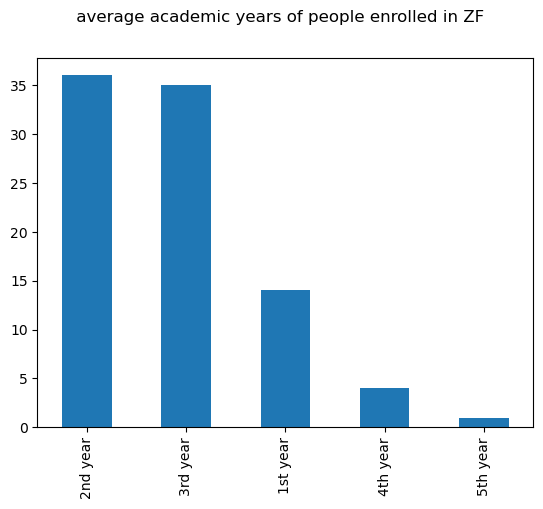

In [53]:
count_academic_year.plot.bar();
pl.suptitle(' average academic years of people enrolled in ZF')

In [52]:
print(count_academic_year.idxmax(),"are the most enrolled people in ZF")
print(count_academic_year.idxmin(),"are the least enrolled people in ZF")

2nd year are the most enrolled people in ZF
5th year are the least enrolled people in ZF


In [102]:
data.dtypes

Timestamp                                              datetime64[ns]
Full Name (3 names at least)                                   object
Phone Number                                                   object
Email                                                          object
Faculty - Department                                           object
Academic Year                                                  object
Date of birth                                          datetime64[ns]
Facebook URL                                                   object
LinkedIn URL (optional)                                        object
What do you know about Z Fast Racing Team?                     object
How did you hear about us?                                     object
Do you have any volunteering experience?                       object
If yes, what is your volunteering experience?                  object
What do you know about electrical vehicle ?                    object
What do you know abo

In [6]:
years=data["Date of birth"].dt.year
years

0     2000
1     2001
2     2000
3     2001
4     2002
      ... 
85    2001
86    2000
87    2003
88    2002
89    2001
Name: Date of birth, Length: 90, dtype: int64

In [157]:
print("the oldest member was born in ",data["Date of birth"].min())
print("the yongest member was born in ",data["Date of birth"].max())

the oldest member was born in  1991-04-04 00:00:00
the yongest member was born in  2022-05-17 00:00:00


Text(0.5, 0.98, 'average years of the people enrolled')

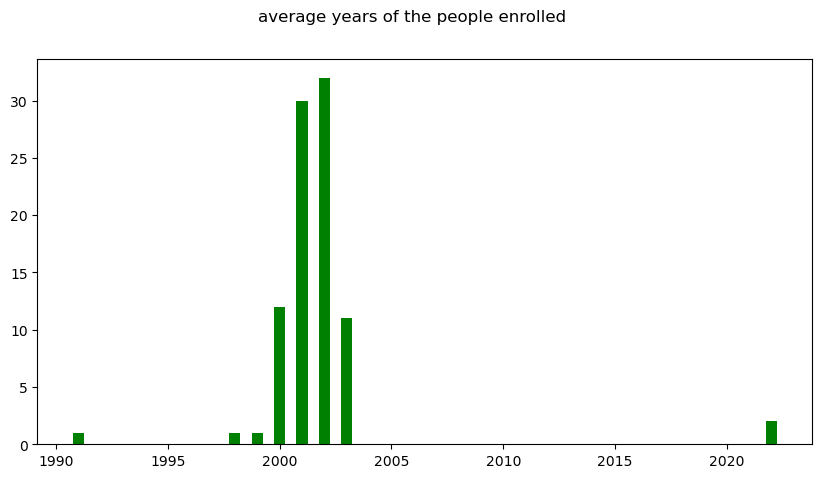

In [22]:
unique, counts = np.unique(years, return_counts=True)
p=dict(zip(unique, counts))
plt.figure(figsize=(10,5))
plt.bar(p.keys(), p.values(), 0.5, color='g')
pl.suptitle('average years of the people enrolled')

In [30]:
print("most of the people enrolled were born in",max(p, key=p.get))

most of the people enrolled were born in 2002


In [33]:
counts=data['Do you have any volunteering experience?'].value_counts()
data['Do you have any volunteering experience?'].value_counts()

Yes    52
No     38
Name: Do you have any volunteering experience?, dtype: int64

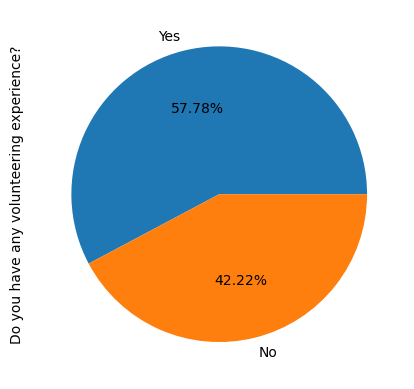

In [34]:
counts.plot.pie(autopct='%.2f%%')
plt.show()

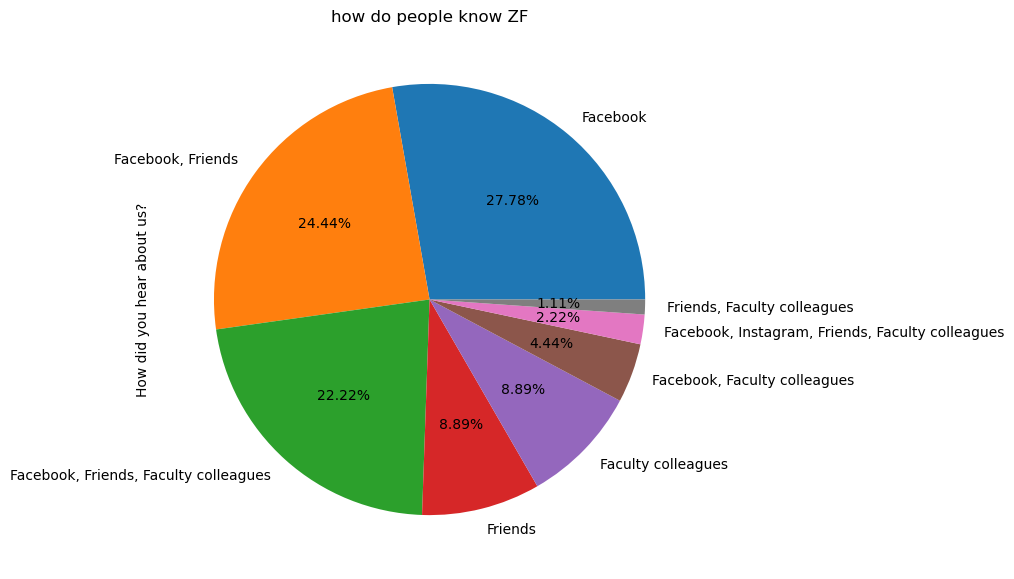

In [51]:
popularty=data['How did you hear about us?'].value_counts()
fig = plt.figure(figsize =(10, 7))
# popularty.plot.pie(autopct='%.2f%%')
popularty.plot(kind='pie', title='how do people know ZF',autopct='%.2f%%')
plt.show()

In [62]:
data.dropna(subset=['LinkedIn URL (optional)'], inplace=True)
column = data['LinkedIn URL (optional)']

def is_link(value):
    if isinstance(value, str):  # Check if value is a string
        return value.startswith('http://') or value.startswith('https://') or value.startswith('www.linkedin')
    return False
is_link_mask = column.apply(is_link)
link_values = column[is_link_mask]
word_values = column[~is_link_mask]
print("Link values:")
print(link_values)
print("\nWord values:")
print(word_values)


Link values:
0     https://www.linkedin.com/in/mohamed-dobea-a911...
1     https://www.linkedin.com/in/mohammed-salah-hasona
3     https://www.linkedin.com/in/omar-soliman-a4198...
5          https://www.linkedin.com/in/mostafa-m-radwan
9                   www.linkedin.com/in/mohamedsalah254
12    https://www.linkedin.com/in/ali-abdelazez-6005...
13            https://www.linkedin.com/in/mahmoud-3mmar
16    https://www.linkedin.com/in/mohammed-ali-03ab2...
20               https://www.linkedin.com/in/minafayeez
21    https://www.linkedin.com/in/mohamed-ahmed-abdu...
22    https://www.linkedin.com/in/mahmoud-nasr-0b523...
23                https://www.linkedin.com/in/xavi-omar
24             https://www.linkedin.com/in/aya-elyamany
25    https://www.linkedin.com/in/abdelrahman-amr-61...
27    https://www.linkedin.com/in/hady-hisham-7317b9...
28    https://www.linkedin.com/in/mohamed-ali-654894188
29    https://www.linkedin.com/in/hesham-khaled-1253...
30    https://www.linkedin.com/in/m

In [96]:

import re
response_column = data['Any questions?']

def has_question(response):
    if isinstance(response, str):  
        return bool(re.search(r'\?', response))
    return False

has_question_mask = response_column.apply(has_question)
questions = data[has_question_mask]
print("question to be answerd")
print(questions['Any questions?'])

question to be answerd
17                  I'm in another college can I join ?
49    If I am not accepted, can you send me a feedba...
73    https://drive.google.com/file/d/1m_e0ol-ksBw5z...
89    How much time and effort should I put in the t...
Name: Any questions?, dtype: object
